In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
asyest = pd.read_csv('csvs/AsyEst.csv')
asyest

,Assemblage,Diversity,Observed,Estimator,s.e.,LCL,UCL
0,bvt,Species richness,7.000000,7.000000,0.000000,7.000000,7.000000
1,bvt,Shannon diversity,4.337579,4.353765,0.135650,4.087897,4.619634
2,bvt,Simpson diversity,3.336322,3.345961,0.150099,3.051772,3.640150
3,camera,Species richness,6.000000,8.979310,1.528873,6.000000,11.975846
4,camera,Shannon diversity,2.400095,2.476240,0.182149,2.119235,2.833245
5,camera,Simpson diversity,1.948744,1.961669,0.134129,1.698781,2.224556
6,net,Species richness,5.000000,5.000000,0.325617,5.000000,5.638197
7,net,Shannon diversity,2.783532,2.799855,0.108583,2.587036,3.012674
8,net,Simpson diversity,2.415094,2.424870,0.087250,2.253863,2.595878


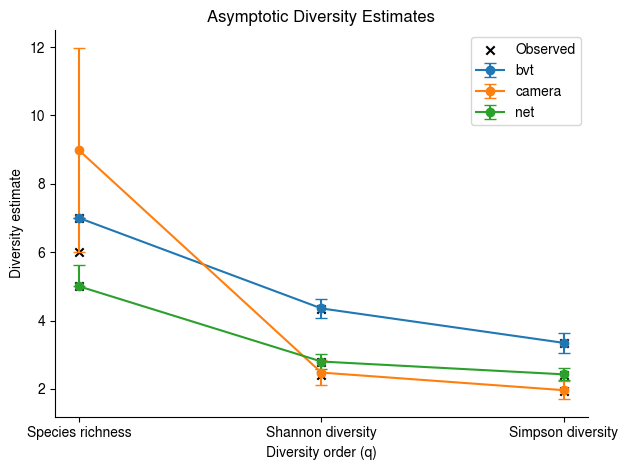

In [ ]:
fig, ax = plt.subplots()

# Loop over assemblages to separate curves
for assemblage, subdf in asyest.groupby("Assemblage"):
    ax.errorbar(
        subdf["Diversity"],        # x-axis
        subdf["Estimator"],        # y-axis
        yerr=[subdf["Estimator"] - subdf["LCL"], subdf["UCL"] - subdf["Estimator"]],
        fmt="o-", capsize=4, label=assemblage
    )

# Optional: add observed values
ax.scatter(asyest["Diversity"], asyest["Observed"], color="black", marker="x", label="Observed")

ax.set_xlabel("Diversity order (q)")
ax.set_ylabel("Diversity estimate")
ax.set_title("Asymptotic Diversity Estimates")
ax.legend()
plt.tight_layout()

In [66]:
pd.read_csv('csvs/DataInfo.csv')

,Assemblage,n,S.obs,SC,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,camera,145,6,0.9795,3,0,0,0,0,0,1,0,0,0
1,bvt,812,7,1.0000,0,0,0,0,0,1,0,0,0,0
2,net,352,5,1.0000,0,1,0,0,0,1,0,0,0,0


In [67]:
size_est = pd.read_csv('csvs/iNextEst_size_based.csv')
size_est

,Assemblage,m,Method,Order.q,qD,qD.LCL,qD.UCL,SC,SC.LCL,SC.UCL
0,camera,1,Rarefaction,0,1.000000,1.000000,1.000000,0.509770,0.439686,0.579854
1,camera,8,Rarefaction,0,2.423351,2.158929,2.687773,0.923625,0.894264,0.952985
2,camera,16,Rarefaction,0,2.893260,2.463425,3.323094,0.954372,0.934902,0.973842
3,camera,24,Rarefaction,0,3.222769,2.672455,3.773084,0.963408,0.946234,0.980581
4,camera,32,Rarefaction,0,3.494746,2.841696,4.147797,0.968943,0.952867,0.985018
...,...,...,...,...,...,...,...,...,...,...
355,net,630,Extrapolation,2,2.419399,2.250208,2.588589,1.000000,0.999750,1.000000
356,net,648,Extrapolation,2,2.419550,2.250331,2.588769,1.000000,0.999774,1.000000
357,net,667,Extrapolation,2,2.419701,2.250454,2.588949,1.000000,0.999798,1.000000
358,net,685,Extrapolation,2,2.419837,2.250564,2.589110,1.000000,0.999817,1.000000


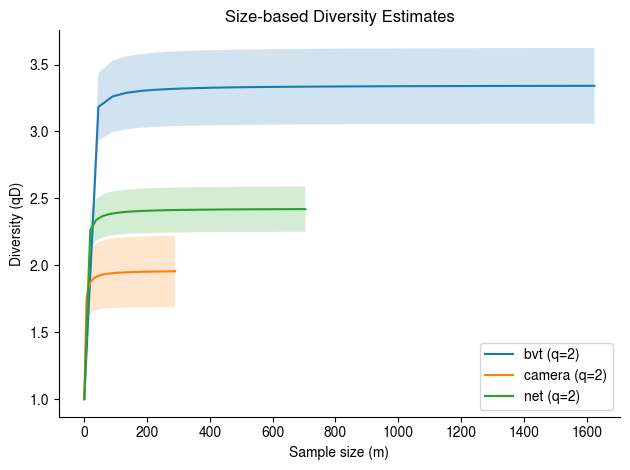

In [68]:
fig, ax = plt.subplots()

q = 2

df_q = size_est[size_est["Order.q"] == q]

for (assemblage, q), subdf in df_q.groupby(["Assemblage", "Order.q"]):
    ax.plot(
        subdf["m"], subdf["qD"], label=f"{assemblage} (q={q})"
    )
    ax.fill_between(
        subdf["m"], subdf["qD.LCL"], subdf["qD.UCL"], alpha=0.2
    )

ax.set_xlabel("Sample size (m)")
ax.set_ylabel("Diversity (qD)")
ax.set_title("Size-based Diversity Estimates")
ax.legend()
plt.tight_layout()

In [69]:
cov_est = pd.read_csv('csvs/iNextEst_coverage_based.csv')
cov_est

,Assemblage,SC,m,Method,Order.q,qD,qD.LCL,qD.UCL
0,camera,0.509770,1,Rarefaction,0,1.000000,0.904678,1.095322
1,camera,0.923625,8,Rarefaction,0,2.423350,1.916934,2.929766
2,camera,0.954372,16,Rarefaction,0,2.893260,2.054108,3.732412
3,camera,0.963408,24,Rarefaction,0,3.222770,2.190796,4.254745
4,camera,0.968942,32,Rarefaction,0,3.494746,2.326195,4.663296
...,...,...,...,...,...,...,...,...
229,net,0.998729,273,Rarefaction,2,2.412280,2.245396,2.579164
230,net,0.999043,292,Rarefaction,2,2.413095,2.246028,2.580163
231,net,0.999368,312,Rarefaction,2,2.413847,2.246576,2.581118
232,net,0.999676,331,Rarefaction,2,2.414477,2.246981,2.581972


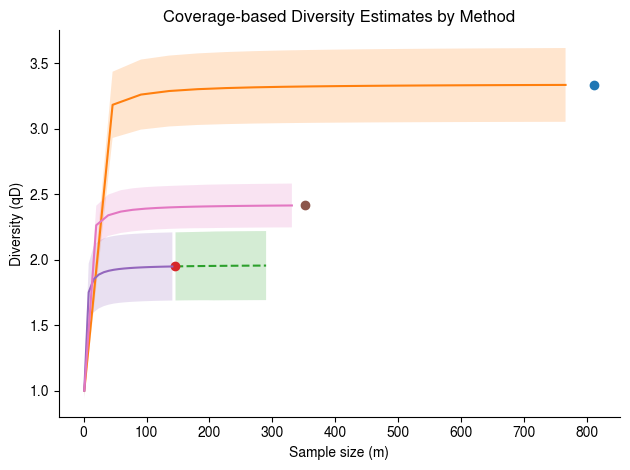

In [70]:
fig, ax = plt.subplots()

method_styles = {
    "Rarefaction": {"linestyle": "-", "marker": ""},
    "Observed": {"linestyle": "None", "marker": "o"},
    "Extrapolation": {"linestyle": "--", "marker": ""}
}

q = 2

df_q = cov_est[cov_est["Order.q"] == q]

for (assemblage, q), subdf in df_q.groupby(["Assemblage", "Order.q"]):
    for method, mdf in subdf.groupby("Method"):
        style = method_styles.get(method, {"linestyle": "-", "marker": ""})
        ax.plot(
            mdf["m"], mdf["qD"],
            label=f"{assemblage}, q={q}, {method}",
            **style
        )
        ax.fill_between(
            mdf["m"], mdf["qD.LCL"], mdf["qD.UCL"],
            alpha=0.2
        )

ax.set_xlabel("Sample size (m)")
ax.set_ylabel("Diversity (qD)")
ax.set_title("Coverage-based Diversity Estimates by Method")
# ax.legend()
plt.tight_layout()

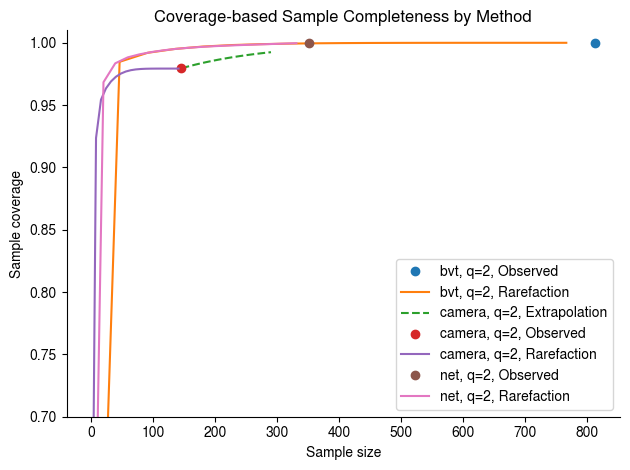

In [72]:
fig, ax = plt.subplots()

method_styles = {
    "Rarefaction": {"linestyle": "-", "marker": ""},
    "Observed": {"linestyle": "None", "marker": "o"},
    "Extrapolation": {"linestyle": "--", "marker": ""}
}

q = 2
df_q = cov_est[cov_est["Order.q"] == q]

for (assemblage, q), subdf in df_q.groupby(["Assemblage", "Order.q"]):
    for method, mdf in subdf.groupby("Method"):
        style = method_styles.get(method, {"linestyle": "-", "marker": ""})
        ax.plot(
            mdf["m"], mdf["SC"],
            label=f"{assemblage}, q={q}, {method}",
            **style
        )
        if "SC.LCL" in mdf and "SC.UCL" in mdf:
            ax.fill_between(
                mdf["m"], mdf["SC.LCL"], mdf["SC.UCL"],
                alpha=0.2
            )

ax.set_xlabel("Sample size")
ax.set_ylabel("Sample coverage")
ax.set_title("Coverage-based Sample Completeness by Method")
ax.set_ylim(0.7, 1.01)
# ax.set_xlim(0, 300)
ax.legend()
plt.tight_layout()